In [15]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split


In [16]:
DATA_DIR = os.path.join(".","cs-train")
df = pd.read_csv(os.path.join(DATA_DIR, 'output_data.csv'))

# Convert invoice_date to datetime
df['invoice_date'] = pd.to_datetime(df['invoice_date'])

df.head()

,country,customer_id,invoice,price,stream_id,times_viewed,year,month,day,invoice_date
0,United Kingdom,13085.0,489434,6.95,85048,12,2017,11,28,2017-11-28
1,United Kingdom,13085.0,489434,6.75,79323W,12,2017,11,28,2017-11-28
2,United Kingdom,13085.0,489434,2.10,22041,21,2017,11,28,2017-11-28
3,United Kingdom,13085.0,489434,1.25,21232,5,2017,11,28,2017-11-28
4,United Kingdom,13085.0,489434,1.65,22064,17,2017,11,28,2017-11-28


In [17]:
# Aggregate revenue by day
df['revenue'] = df['price']
daily_revenue = df.groupby('invoice_date')['revenue'].sum().reset_index()

# Set the invoice_date as the index
daily_revenue.set_index('invoice_date', inplace=True)


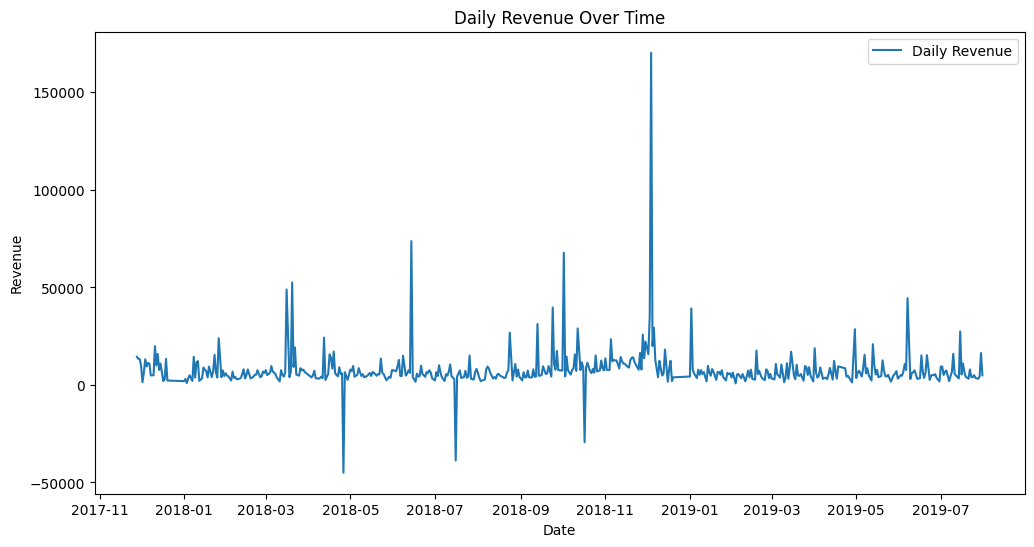

In [18]:
# Plot daily revenue
plt.figure(figsize=(12, 6))
plt.plot(daily_revenue.index, daily_revenue['revenue'], label='Daily Revenue')
plt.title('Daily Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.show()
